In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Generate Data
weeks_with_storm = np.random.binomial(1, 1.0/(52*.5), 52*200) 
date_range = pd.date_range(start='1/1/2003', periods=52*200, freq='W-MON')
df = pd.DataFrame({'date': date_range, 'storm': weeks_with_storm})
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df.head(), 

(        date  storm  year
 0 2003-01-06      0  2003
 1 2003-01-13      0  2003
 2 2003-01-20      0  2003
 3 2003-01-27      0  2003
 4 2003-02-03      0  2003,)

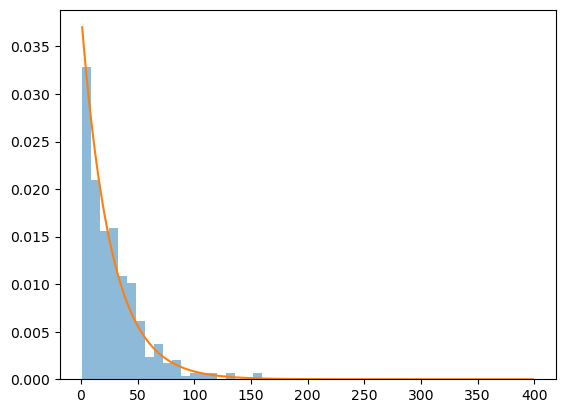

In [6]:
plt.hist(np.diff(np.arange(len(df['storm']))[df['storm'] == 1]), density=True, bins=20, alpha=0.5, label='Storm')
plt.plot(np.arange(1, 400), np.exp(-np.arange(1, 400)/26)/26, label='Exponential')

In [7]:


def simulator(step):
  def wrapper(prev, decay, forcing):
    first = True
    while True:
      if isinstance(forcing, float):
        yield prev
        prev = step(prev, decay, forcing)
        
      else:
        if first:
          first=False
          yield prev, 0
        
        force = .5*np.tanh(next(forcing)) + .5
        prev = step(prev, decay, force)
        yield prev, force
        
        
        
  return wrapper

@simulator
def simulate_step(prev, decay, forcing):
  return prev * decay + (1 - prev) * forcing * .2

In [8]:
def random_forcing():
  while True:
    yield np.random.normal(0, .5)

In [9]:
sim = simulate_step(0.0, 0.8, random_forcing())
sim_data = np.array([next(sim) for _ in range(100)])

In [10]:
import statsmodels.api as sm

In [26]:
sim_result_noisy = np.clip(sim_data[:,0] + np.random.normal(0, 0.2, sim_data.shape[0]), 0, 1)

In [27]:
data = np.vstack((sim_data[1:, 1]*(1-sim_data[:-1, 0]), sim_data[:-1,0])).T

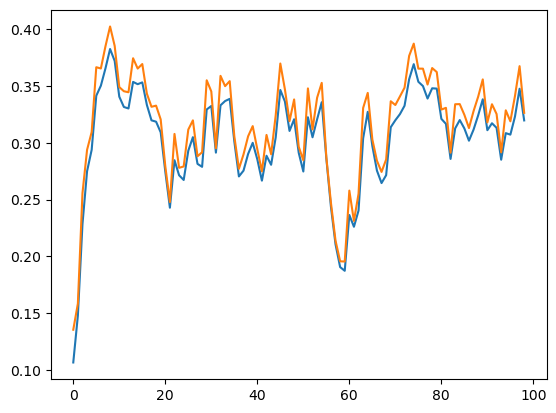

In [28]:
ols = sm.OLS(sim_result_noisy[1:], (data)).fit()
plt.plot(ols.predict())
plt.plot(sim_data[1:, 0])

In [29]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.702
Model:                            OLS   Adj. R-squared (uncentered):              0.696
Method:                 Least Squares   F-statistic:                              114.5
Date:                Tue, 08 Oct 2024   Prob (F-statistic):                    2.93e-26
Time:                        23:49:43   Log-Likelihood:                          19.168
No. Observations:                  99   AIC:                                     -34.34
Df Residuals:                      97   BIC:                                     -29.15
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1575      0.119      1.321      0.190      -0.079       0.394
x2             0.8006      0.135      5.936      0.000       0.533       1.068
==============================================================================
Omnibus:                        4.238   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                2.330
Skew:                           0.099   Prob(JB):                        0.312
Kurtosis:                       2.275   Cond. No.                         4.03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

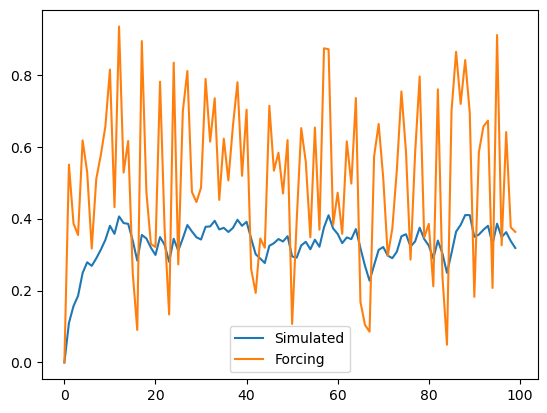

In [260]:
sim_data = np.array(sim_data)
plt.plot((sim_data), label=['Simulated', 'Forcing'])
plt.legend()